In [1]:
import numpy as np
import pandas as pd
%pylab inline
from datetime import datetime
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading different dataframes and dropping duplicates
accidents_12_14 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)
accidents_09_11 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
accidents_05_07 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
accidents_12_14 = accidents_12_14.drop_duplicates()
accidents_09_11 = accidents_09_11.drop_duplicates()
accidents_05_07 = accidents_05_07.drop_duplicates()

In [3]:
# Concatenating 3 data frames to a single one
accidents = pd.concat([accidents_05_07, accidents_09_11, accidents_12_14])

In [4]:
# Deleted the column with NO details
accidents.drop('Junction_Detail', axis=1, inplace=True)

# Filling NA values for location as 0.0
accidents['Location_Easting_OSGR'].fillna(0.0, inplace=True)
accidents['Location_Northing_OSGR'].fillna(0.0, inplace=True)
accidents['Longitude'].fillna(0.0, inplace=True)
accidents['Latitude'].fillna(0.0, inplace=True)

In [5]:
# Filling missing values for categorical variables
accidents['Junction_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Human_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Physical_Facilities'].fillna('Unknown', inplace=True)
accidents['Weather_Conditions'].fillna('Unknown', inplace=True)
accidents['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
accidents['Special_Conditions_at_Site'].fillna('Unknown', inplace=True)
accidents['Carriageway_Hazards'].fillna('Unknown', inplace=True)
accidents['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)
accidents['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)

In [6]:
# Find the mean value of the Hour in Time colums
t = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
t = t[t != 'nan'].map(int)
int(ceil(t.mean()))

14

In [7]:
# Adding a new column 'hour' and replacing the 'nans' with the mean value
accidents['Hour'] = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
accidents['Hour'].replace('nan', 14, inplace= True)
accidents['Hour'] = accidents['Hour'].map(int)
accidents.drop('Time', inplace=True, axis=1)

In [8]:
# Converting Date column into Date time
accidents['Date'] = pd.to_datetime(accidents['Date'], format = '%d/%m/%Y')

In [9]:
# Function to check if the weather is windy or not
def isWindy(weather):
    if 'with high winds' in weather:
        return 'Yes'
    elif 'without high winds' in weather:
        return 'No'
    else:
        return "Unknown"

In [10]:
# Adding a new column to capture the effect of wind separately
accidents['Wind'] = accidents['Weather_Conditions'].map(isWindy)

In [11]:
# Splitting Weather Conditions and taking the first word. Adding a new column
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].map(lambda x: x.split()[0])
accidents['Weather_Conditions'].replace('Other', 'Unknown', inplace=True)

In [12]:
accidents = accidents.reset_index().drop('index', axis=1)

In [13]:
accidents.shape

(1469995, 33)

In [14]:
accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
1469990,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,2014-12-07,...,Snowing,Snow,None,None,2,Yes,Unknown,2014,22,No
1469991,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,2014-12-11,...,Fine,Snow,None,None,2,Yes,Unknown,2014,6,No
1469992,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,2014-12-09,...,Fine,Frost/Ice,None,None,2,Yes,Unknown,2014,2,No
1469993,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,2014-12-17,...,Raining,Wet/Damp,None,None,2,Yes,Unknown,2014,6,No
1469994,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,2014-12-24,...,Fine,Wet/Damp,None,None,2,Yes,Unknown,2014,15,No


In [15]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469995 entries, 0 to 1469994
Data columns (total 33 columns):
Accident_Index                                 1469995 non-null object
Location_Easting_OSGR                          1469995 non-null float64
Location_Northing_OSGR                         1469995 non-null float64
Longitude                                      1469995 non-null float64
Latitude                                       1469995 non-null float64
Police_Force                                   1469995 non-null int64
Accident_Severity                              1469995 non-null int64
Number_of_Vehicles                             1469995 non-null int64
Number_of_Casualties                           1469995 non-null int64
Date                                           1469995 non-null datetime64[ns]
Day_of_Week                                    1469995 non-null int64
Local_Authority_(District)                     1469995 non-null int64
Local_Authority_(Highway)    

In [16]:
# All nulls have been removed
sum(accidents.isna())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

In [17]:
# converting categorical variables
accidents['Accident_Severity'].replace([1, 2, 3],['Fatal', 'Severe', 'Slight'], inplace=True)
accidents['Day_of_Week'].replace([1,2,3,4,5,6,7],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)

In [18]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,Slight,1,1,2005-01-05,...,Fine,Dry,None,None,1,Yes,E01002909,2005,17,No
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,Slight,2,1,2005-01-06,...,Fine,Dry,None,None,1,Yes,E01002857,2005,0,No
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,Slight,1,1,2005-01-07,...,Fine,Dry,None,None,1,Yes,E01002840,2005,10,No
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,Slight,1,1,2005-01-10,...,Fine,Wet/Damp,None,None,1,Yes,E01002863,2005,21,No


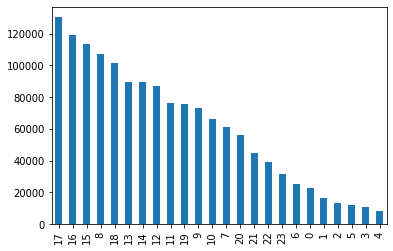

In [19]:
accidents['Hour'].value_counts().plot(kind='bar')

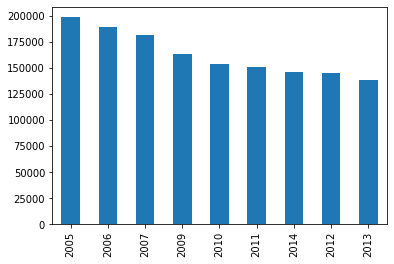

In [20]:
accidents['Year'].value_counts().plot(kind='bar')

In [21]:
mask_accident_severity = accidents['Accident_Severity'] == 'Slight'
accidents_filtered = accidents[~mask_accident_severity]
accidents_filtered.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
16,200501BS00019,524680.0,179450.0,-0.205139,51.500191,1,Severe,2,1,2005-01-20,...,Fine,Dry,None,None,1,Yes,E01002864,2005,0,No
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1,Severe,1,1,2005-01-08,...,Fine,Dry,None,None,1,Yes,E01002821,2005,3,No
30,200501BS70003,523910.0,181390.0,-0.215545,51.517796,1,Severe,2,2,2005-02-01,...,Raining,Wet/Damp,None,None,1,Yes,E01002878,2005,17,No
52,200501BS70029,524100.0,181830.0,-0.212653,51.521709,1,Severe,1,1,2005-02-15,...,Fine,Dry,None,None,1,Yes,E01002905,2005,18,No


In [23]:
accidents_filtered['Year'].value_counts()

2005    27942
2006    27872
2007    27036
2009    24054
2011    22782
2012    22538
2014    22334
2010    22171
2013    21232
Name: Year, dtype: int64

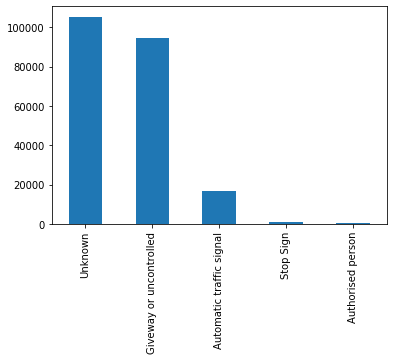

In [22]:
accidents_filtered['Junction_Control'].value_counts().plot(kind = 'bar')
#We can see that clearly even putting a traffic signal reduced accidents by 6 times. But probably effect due to single carriageway

In [57]:
#relation between junction control and day of week
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Day_of_Week', values = 'Accident_Index', aggfunc = 'count')

#no particular relation observed

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Junction_Control,,,,,,,
Authorised person,41,29,41,29,35,39,42
Automatic traffic signal,2790,2287,2384,1911,2488,2439,2417
Giveway or uncontrolled,15307,12970,13274,11279,14058,13840,13840
Stop Sign,161,146,152,123,141,134,151
Unknown,16441,13941,16904,15574,14645,13947,13961


In [56]:
#relation between junction control and 1st_Road_Class
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = '1st_Road_Class', values = 'Accident_Index', aggfunc = 'count')

#Check for Road class 3

1st_Road_Class,1,2,3,4,5,6
Junction_Control,,,,,,
Authorised person,1.0,NaN,132.0,31.0,18.0,74.0
Automatic traffic signal,85.0,9.0,12053.0,1671.0,949.0,1949.0
Giveway or uncontrolled,757.0,82.0,42287.0,13408.0,8813.0,29221.0
Stop Sign,NaN,NaN,444.0,183.0,97.0,284.0
Unknown,5795.0,448.0,46416.0,14988.0,9619.0,28147.0


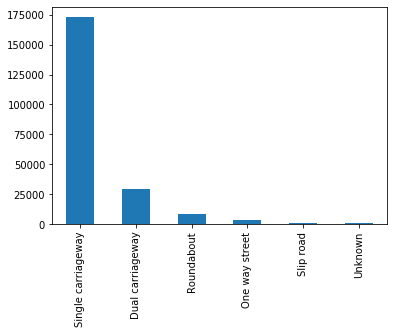

In [26]:
# seeing road_type trend
accidents_filtered['Road_Type'].value_counts().plot(kind = 'bar')

#need to isolate single carriageway

In [55]:
#relation between junction control and Road_Type
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Road_Type', values = 'Accident_Index', aggfunc = 'count')


Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Junction_Control,,,,,,
Authorised person,30,5,15,197,3,6
Automatic traffic signal,4008,660,675,11215,108,50
Giveway or uncontrolled,7260,1865,8167,76161,808,307
Stop Sign,50,22,21,906,4,5
Unknown,18405,1444,96,84350,556,562


In [28]:
#Isolating Single Carriageway
accidents_single_carr = accidents_filtered[accidents_filtered['Road_Type']=='Single carriageway']
accidents_single_carr

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
16,200501BS00019,524680.0,179450.0,-0.205139,51.500191,1,Severe,2,1,2005-01-20,...,Fine,Dry,None,None,1,Yes,E01002864,2005,0,No
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1,Severe,1,1,2005-01-08,...,Fine,Dry,None,None,1,Yes,E01002821,2005,3,No
52,200501BS70029,524100.0,181830.0,-0.212653,51.521709,1,Severe,1,1,2005-02-15,...,Fine,Dry,None,None,1,Yes,E01002905,2005,18,No
85,200501BS70066,524830.0,179160.0,-0.203081,51.497552,1,Severe,2,1,2005-03-01,...,Raining,Wet/Damp,None,None,1,No,E01002814,2005,19,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469976,2.01E+12,319519.0,566948.0,-3.259393,54.990615,98,Severe,2,3,2014-09-27,...,Fine,Dry,None,None,2,Yes,Unknown,2014,14,No
1469980,2.01E+12,319657.0,566553.0,-3.257125,54.987088,98,Severe,2,1,2014-11-05,...,Unknown,Wet/Damp,None,None,2,No,Unknown,2014,15,Unknown
1469983,2.01E+12,310318.0,590421.0,-3.410558,55.199911,98,Severe,3,1,2014-11-17,...,Fine,Dry,None,None,2,Yes,Unknown,2014,16,No
1469986,2.01E+12,316306.0,568290.0,-3.309988,55.002141,98,Fatal,1,3,2014-11-25,...,Fine,Wet/Damp,None,None,2,Yes,Unknown,2014,15,No


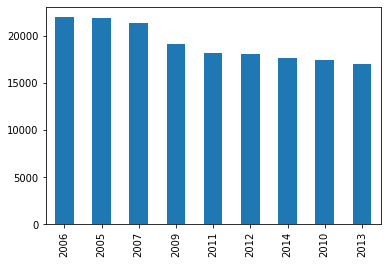

In [29]:
accidents_single_carr['Year'].value_counts().plot(kind='bar')

In [54]:
#relation between junction control and Speed_limit
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Speed_limit', values = 'Accident_Index', aggfunc = 'count')

#Speedlimit 30 has maximum

Speed_limit,10,20,30,40,50,60,70
Junction_Control,,,,,,,
Authorised person,NaN,3.0,184.0,17.0,10.0,35.0,7.0
Automatic traffic signal,NaN,161.0,13589.0,1991.0,415.0,325.0,235.0
Giveway or uncontrolled,NaN,1178.0,64561.0,7522.0,2846.0,15118.0,3343.0
Stop Sign,NaN,15.0,588.0,104.0,45.0,247.0,9.0
Unknown,4.0,1079.0,44015.0,8406.0,4758.0,35379.0,11772.0


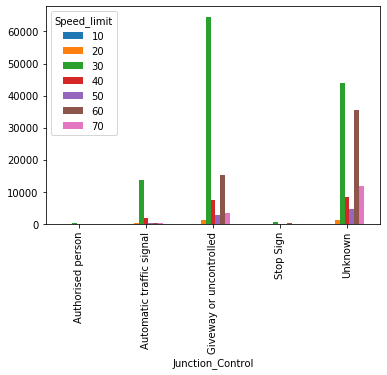

In [31]:
df_junc_vs_speed.plot(kind = 'bar')

In [32]:
accidents_filtered.groupby(['Junction_Control'])[['Speed_limit']].mean()

,Speed_limit
Junction_Control,
Authorised person,36.523438
Automatic traffic signal,32.736899
Giveway or uncontrolled,37.482658
Stop Sign,39.484127
Unknown,46.132735


In [53]:
#relation between junction control and Speed_limit for only single carriageway
pd.pivot_table(accidents_single_carr,index = 'Junction_Control',
                    columns = 'Speed_limit', values = 'Accident_Index', aggfunc = 'count')


Speed_limit,10,20,30,40,50,60,70
Junction_Control,,,,,,,
Authorised person,NaN,3.0,152.0,9.0,5.0,28.0,NaN
Automatic traffic signal,NaN,125.0,10185.0,626.0,104.0,175.0,NaN
Giveway or uncontrolled,NaN,998.0,55165.0,4935.0,1846.0,13216.0,1.0
Stop Sign,NaN,13.0,528.0,92.0,39.0,234.0,NaN
Unknown,4.0,929.0,39774.0,6253.0,3294.0,34096.0,NaN


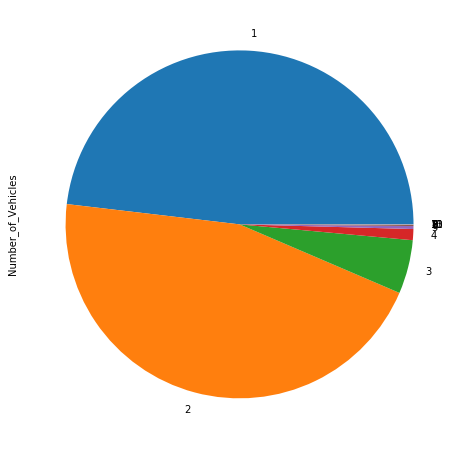

In [39]:

accidents_single_carr[accidents_single_carr['Speed_limit']==30]['Number_of_Vehicles'].value_counts().plot(kind = 'pie',figsize = (8,8))

In [52]:
#relation between junction control and Pedestrian_Crossing-Human_Control
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Pedestrian_Crossing-Human_Control', values = 'Accident_Index', aggfunc = 'count')

#1. Giveway and none within 50 metres
#2. automatic traffic signal and non within 50 metres is also high
#3 in comparison, with control, number of accidents are much much fewer. Could it be because control not included in single carriageway?

Pedestrian_Crossing-Human_Control,Control by other authorised person,Control by school crossing patrol,None within 50 metres,Unknown
Junction_Control,,,,
Authorised person,16.0,14.0,226.0,NaN
Automatic traffic signal,215.0,41.0,16460.0,NaN
Giveway or uncontrolled,257.0,164.0,94146.0,1.0
Stop Sign,12.0,2.0,994.0,NaN
Unknown,176.0,135.0,105100.0,2.0


In [51]:
#relation between junction control and Pedestrian_Crossing-Physical_Facilities
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Pedestrian_Crossing-Physical_Facilities', values = 'Accident_Index', aggfunc = 'count')

#Highest is when giveway or uncontrolled and no physical crossing. Maybe again due to single carriageway
#Also to note, for traffic signal and pedestrian phase at traffic signal is next.

Pedestrian_Crossing-Physical_Facilities,Central refuge,Footbridge or subway,No physical crossing within 50 meters,Pedestrian phase at traffic signal junction,Unknown,Zebra crossing,non-junction pedestrian crossing
Junction_Control,,,,,,,
Authorised person,7.0,1.0,186.0,13.0,NaN,9.0,40.0
Automatic traffic signal,344.0,68.0,4331.0,9883.0,1.0,115.0,1974.0
Giveway or uncontrolled,3132.0,297.0,80744.0,1046.0,3.0,3553.0,5793.0
Stop Sign,20.0,2.0,870.0,23.0,NaN,37.0,56.0
Unknown,1281.0,220.0,97529.0,1035.0,3.0,1361.0,3984.0


In [50]:
#relation between junction control and Light_Conditions
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Light_Conditions', values = 'Accident_Index', aggfunc = 'count')

#Highest in Daylight

Light_Conditions,Darkeness: No street lighting,Darkness: Street lighting unknown,Darkness: Street lights present and lit,Darkness: Street lights present but unlit,Daylight: Street light present
Junction_Control,,,,,
Authorised person,7,3,66,1,179
Automatic traffic signal,29,127,5719,69,10772
Giveway or uncontrolled,3713,902,22361,473,67119
Stop Sign,56,7,211,3,731
Unknown,15507,1137,18423,574,69772


In [49]:
#relation between junction control and Weather_Conditions
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Weather_Conditions', values = 'Accident_Index', aggfunc = 'count')
#1. Fine 2. Raining

Weather_Conditions,Fine,Fog,Raining,Snowing,Unknown
Junction_Control,,,,,
Authorised person,216,2,27,1,10
Automatic traffic signal,14162,39,1983,60,472
Giveway or uncontrolled,80501,461,10412,450,2744
Stop Sign,845,7,122,11,23
Unknown,87276,797,12982,866,3492


In [48]:
#relation between junction control and Road_Surface_Conditions
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Road_Surface_Conditions', values = 'Accident_Index', aggfunc = 'count')
#1. Dry 2. Wet/Damp

Road_Surface_Conditions,Dry,Flood (Over 3cm of water),Frost/Ice,Snow,Unknown,Wet/Damp
Junction_Control,,,,,,
Authorised person,187.0,1.0,1.0,2.0,NaN,65.0
Automatic traffic signal,12433.0,6.0,139.0,38.0,20.0,4080.0
Giveway or uncontrolled,68896.0,58.0,1046.0,318.0,97.0,24153.0
Stop Sign,704.0,NaN,9.0,3.0,NaN,292.0
Unknown,70349.0,255.0,2646.0,728.0,95.0,31340.0


In [47]:
#relation between junction control and Special_Conditions_at_Site
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Special_Conditions_at_Site', values = 'Accident_Index', aggfunc = 'count')

#None 

Special_Conditions_at_Site,Auto traffic signal partly defective,Auto traffic singal out,Mud,None,Ol or diesel,Permanent sign or marking defective or obscured,Road surface defective,Roadworks,Unknown
Junction_Control,,,,,,,,,
Authorised person,NaN,NaN,2.0,245.0,NaN,2.0,3.0,4.0,NaN
Automatic traffic signal,57.0,127.0,8.0,16246.0,38.0,12.0,28.0,200.0,NaN
Giveway or uncontrolled,18.0,81.0,146.0,92924.0,316.0,181.0,226.0,675.0,1.0
Stop Sign,NaN,NaN,2.0,979.0,2.0,12.0,2.0,11.0,NaN
Unknown,25.0,106.0,475.0,102502.0,610.0,84.0,569.0,1040.0,2.0


# Starting fresh for Pedestrian_Crossing-Physical_Facilities


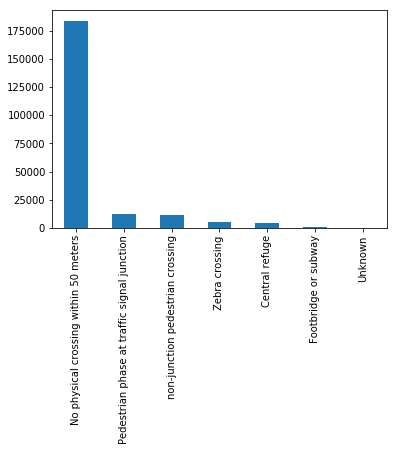

In [49]:
accidents_filtered['Pedestrian_Crossing-Physical_Facilities'].value_counts().plot(kind = 'bar')

In [58]:
#relation between day of week
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Day_of_Week', values = 'Accident_Index', aggfunc = 'count')

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Pedestrian_Crossing-Physical_Facilities,,,,,,,
Central refuge,850.0,621.0,665.0,537.0,723.0,721.0,667.0
Footbridge or subway,93.0,80.0,97.0,57.0,83.0,95.0,83.0
No physical crossing within 50 meters,28946.0,24664.0,27925.0,25334.0,26184.0,25274.0,25333.0
Pedestrian phase at traffic signal junction,1998.0,1649.0,1698.0,1316.0,1800.0,1824.0,1715.0
Unknown,NaN,1.0,NaN,3.0,1.0,1.0,1.0
Zebra crossing,853.0,726.0,665.0,492.0,777.0,777.0,785.0
non-junction pedestrian crossing,2000.0,1632.0,1705.0,1177.0,1799.0,1707.0,1827.0


In [59]:
#relation with year
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Year', values = 'Accident_Index', aggfunc = 'count')
#Over the years, number of accidents with no physical crossing has reduced.

Year,2005,2006,2007,2009,2010,2011,2012,2013,2014
Pedestrian_Crossing-Physical_Facilities,,,,,,,,,
Central refuge,543.0,464.0,504.0,499.0,479.0,581.0,583.0,557.0,574.0
Footbridge or subway,81.0,76.0,71.0,61.0,67.0,62.0,65.0,43.0,62.0
No physical crossing within 50 meters,24061.0,23891.0,23151.0,20307.0,18528.0,18959.0,18601.0,17559.0,18603.0
Pedestrian phase at traffic signal junction,1384.0,1496.0,1325.0,1283.0,1307.0,1325.0,1339.0,1283.0,1258.0
Unknown,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zebra crossing,570.0,548.0,569.0,582.0,582.0,560.0,600.0,516.0,548.0
non-junction pedestrian crossing,1297.0,1396.0,1416.0,1322.0,1208.0,1295.0,1350.0,1274.0,1289.0


In [61]:
#relation with number of vehicles
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Number_of_Vehicles', values = 'Accident_Index', aggfunc = 'count').max()
#Interesting to note that accidents involving one vehicle is so high


Number_of_Vehicles
1     76203.0
2     88840.0
3     13784.0
4      3293.0
5       914.0
6       346.0
7       137.0
8        69.0
9        28.0
10       18.0
11        6.0
12        4.0
13        5.0
14        2.0
16        1.0
17        1.0
18        1.0
19        2.0
21        1.0
22        1.0
28        1.0
29        1.0
34        1.0
67        1.0
dtype: float64

In [65]:
#relation with Road type
df_pedphys_vs_roadtype = pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Road_Type', values = 'Accident_Index', aggfunc = 'count')
df_pedphys_vs_roadtype

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Pedestrian_Crossing-Physical_Facilities,,,,,,
Central refuge,491.0,55.0,623.0,3588.0,13.0,14.0
Footbridge or subway,248.0,11.0,114.0,198.0,12.0,5.0
No physical crossing within 50 meters,24018.0,2740.0,7241.0,147451.0,1371.0,839.0
Pedestrian phase at traffic signal junction,2631.0,539.0,217.0,8541.0,44.0,28.0
Unknown,1.0,NaN,1.0,5.0,NaN,NaN
Zebra crossing,239.0,160.0,300.0,4345.0,14.0,17.0
non-junction pedestrian crossing,2125.0,491.0,478.0,8701.0,25.0,27.0


In [68]:
# isolating single carr
temp = accidents_filtered[accidents_filtered['Road_Type'] == 'Single carriageway']


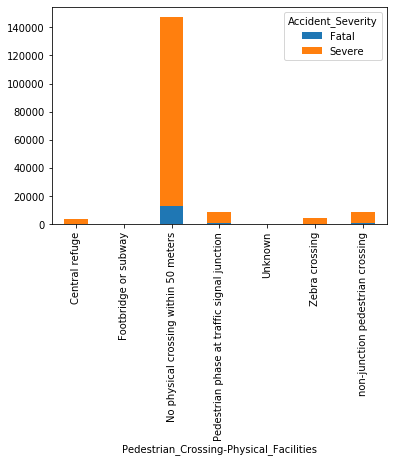

In [71]:
pd.pivot_table(temp, index = 'Pedestrian_Crossing-Physical_Facilities', columns ='Accident_Severity',
                      values = 'Accident_Index', aggfunc = 'count').plot(kind = 'bar', stacked = True)

In [72]:
temp['LSOA_of_Accident_Location'].value_counts()

Unknown      15723
E01000004      243
E01004736      136
E01004764      103
E01011365       86
             ...  
E01018885        1
E01020692        1
E01029195        1
E01003167        1
E01019363        1
Name: LSOA_of_Accident_Location, Length: 30629, dtype: int64

In [73]:
#relation with speed limit
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Speed_limit', values = 'Accident_Index', aggfunc = 'count')

Speed_limit,10,20,30,40,50,60,70
Pedestrian_Crossing-Physical_Facilities,,,,,,,
Central refuge,NaN,47.0,3532.0,683.0,152.0,288.0,82.0
Footbridge or subway,NaN,5.0,253.0,166.0,50.0,47.0,67.0
No physical crossing within 50 meters,4.0,1934.0,93687.0,14735.0,7570.0,50579.0,15151.0
Pedestrian phase at traffic signal junction,NaN,157.0,10478.0,1084.0,175.0,70.0,36.0
Unknown,NaN,NaN,2.0,1.0,3.0,1.0,NaN
Zebra crossing,NaN,105.0,4787.0,119.0,13.0,46.0,5.0
non-junction pedestrian crossing,NaN,188.0,10198.0,1252.0,111.0,73.0,25.0


In [74]:
#relation with Pedestrian_Crossing-Human_Control
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Pedestrian_Crossing-Human_Control', values = 'Accident_Index', aggfunc = 'count')

Pedestrian_Crossing-Human_Control,Control by other authorised person,Control by school crossing patrol,None within 50 metres,Unknown
Pedestrian_Crossing-Physical_Facilities,,,,
Central refuge,36.0,21.0,4727.0,NaN
Footbridge or subway,3.0,2.0,583.0,NaN
No physical crossing within 50 meters,68.0,182.0,183408.0,2.0
Pedestrian phase at traffic signal junction,215.0,33.0,11752.0,NaN
Unknown,NaN,NaN,6.0,1.0
Zebra crossing,66.0,51.0,4958.0,NaN
non-junction pedestrian crossing,288.0,67.0,11492.0,NaN


In [75]:
#relation Light_Conditions
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Light_Conditions', values = 'Accident_Index', aggfunc = 'count')

Light_Conditions,Darkeness: No street lighting,Darkness: Street lighting unknown,Darkness: Street lights present and lit,Darkness: Street lights present but unlit,Daylight: Street light present
Pedestrian_Crossing-Physical_Facilities,,,,,
Central refuge,45.0,39.0,1431.0,32.0,3237.0
Footbridge or subway,15.0,2.0,197.0,3.0,371.0
No physical crossing within 50 meters,19209.0,1948.0,35630.0,951.0,125922.0
Pedestrian phase at traffic signal junction,8.0,83.0,4131.0,49.0,7729.0
Unknown,NaN,NaN,3.0,NaN,4.0
Zebra crossing,15.0,33.0,1509.0,23.0,3495.0
non-junction pedestrian crossing,20.0,71.0,3879.0,62.0,7815.0


In [76]:
#relation Weather_Conditions
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Weather_Conditions', values = 'Accident_Index', aggfunc = 'count')

Weather_Conditions,Fine,Fog,Raining,Snowing,Unknown
Pedestrian_Crossing-Physical_Facilities,,,,,
Central refuge,4088.0,13.0,561.0,16.0,106.0
Footbridge or subway,503.0,4.0,64.0,1.0,16.0
No physical crossing within 50 meters,153956.0,1222.0,21415.0,1259.0,5808.0
Pedestrian phase at traffic signal junction,10163.0,21.0,1444.0,39.0,333.0
Unknown,5.0,NaN,2.0,NaN,NaN
Zebra crossing,4298.0,12.0,599.0,26.0,140.0
non-junction pedestrian crossing,9987.0,34.0,1441.0,47.0,338.0


In [77]:
#relation Road_Surface_Conditions
pd.pivot_table(accidents_filtered,index = 'Pedestrian_Crossing-Physical_Facilities',
                    columns = 'Road_Surface_Conditions', values = 'Accident_Index', aggfunc = 'count')

Road_Surface_Conditions,Dry,Flood (Over 3cm of water),Frost/Ice,Snow,Unknown,Wet/Damp
Pedestrian_Crossing-Physical_Facilities,,,,,,
Central refuge,3350.0,1.0,56.0,15.0,3.0,1359.0
Footbridge or subway,433.0,NaN,4.0,1.0,NaN,150.0
No physical crossing within 50 meters,127434.0,310.0,3552.0,1009.0,169.0,51186.0
Pedestrian phase at traffic signal junction,9026.0,4.0,82.0,22.0,18.0,2848.0
Unknown,3.0,NaN,NaN,NaN,NaN,4.0
Zebra crossing,3757.0,3.0,38.0,12.0,10.0,1255.0
non-junction pedestrian crossing,8566.0,2.0,109.0,30.0,12.0,3128.0
